<div>
    <div class="row" style="color: #FFFFFF;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Pràctica 1: Cas d'estudi de mineria de dades</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #00CCFF;color: #000000;font-size: 25px;padding: 5px 12px;">
        <div class="col-md-6">
            <div>Mineria de dades</div>
        </div>
        <div class="col-md-6" style="font-size: 14px;">
            <div style="text-align:left;">Autor: Marc Nosàs Pomares <br>
        </div>
    </div>
</div>

Aquest és el document amb el codi utilitzat per a la realització de la pràctica, el complementaré amb un informe explicant cada un els passos seguits.

### Importació de llibreries

In [12]:
import pandas as pd
from practica1 import *
import seaborn as sns
import matplotlib.pyplot as plt

# Update display options for horizontal and vertical scrolling
pd.options.display.width = 1000
pd.options.display.max_rows = 1000  # Set max_rows to a large value to display all rows
pd.options.display.max_columns = None

#### 3. Presentació del dataset

In [13]:
#######################################################################################################################

# Aquest codi és l'inicial que he executat però que no funcionarà perque he eliminat el path per raons de privacitat
# path = r"Data-private/"
# names = ['2021.csv', 
#          '2022.csv', 
#          '2023.csv']

# df = open_csvs(path, names, encoding='utf-8')
# df = make_private(df)

#######################################################################################################################

#### 5. Anàlisis exploratori del Dataset 
##### 5.1 Verifiació de la qualitat de les dades

In [14]:
# Ara obrim el fitxer de la data amb la que comencem a treballar
df = pd.read_csv('Data/hotel_bookings.csv', encoding='utf-8', low_memory=False)
df['Booking ID'] = df['Booking ID'].astype(str)
df['T Booking ID'] = df['T Booking ID'].astype(str)

In [15]:
# Abans de res, per a que sigui més fàcil treballar amb les dades, canviem el nom de les columnes
# Ho posem tot en minúscules i substituim els espais per guions baixos
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')
# A més treurem tots els caràcters especials que hi pugui haver en els noms de les columnes
df.columns = df.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [16]:
df.sample(4)

,motor,booking_id,t_booking_id,booking_date,check_in,check_out,unidades,linea_de_inventario,pax,noches,estado_reserva,importe_total,deposito,divisa,tipo_pago,estado_email_cliente,estado_email_hotel,noches_habitacion,ultima_mod,tipo_alojamiento,ocupacion,pension,antelacion_dias,extras,promociones,pais,motivo_cancelacion,fecha_cancelacion,tipo_organizacion,reserva_combinada,origin,mode,codigos_promocionales,fidelizada,no_show
287487,hotel_126,1997.01,1997,2023-06-05T09:05:50,2023-06-05,2023-06-06,1,DeluxeSuiteViews_1a_HD_nr,1,1,OK,"567,00","567,00",EUR,pay_no_pain_v2,SEND,OPEN,1,NaN,DeluxeSuiteViews,1a,HD,0,"e_eCREDIT,e_eCHECKO",False,ES,NaN,NaN,NaN,False,NaN,NaN,False,False,NONE
94263,hotel_44,270376.01,270376,2022-09-30T11:23:56,2022-10-03,2022-10-04,1,petit_1a_SA_lm,1,1,OK,"121,59","0,00",EUR,without_card,HARD_BOUNCE,SEND,1,NaN,petit,1a,SA,3,e_desayuno,True,FR,NaN,NaN,NaN,False,backoffice,NaN,False,False,NONE
55516,hotel_95,36419.01,36419,2022-12-01T10:44:54,2022-12-24,2022-12-26,1,ST_2a_SA_EB1,2,2,OK,"144,14","0,00",EUR,pay_no_pain_v2,OPEN,SEND,2,NaN,ST,2a,SA,23,NaN,False,ES,NaN,NaN,NaN,False,NaN,NaN,False,False,NONE
170679,hotel_89,173779.01,173779,2022-03-16T10:48:10,2022-04-26,2022-04-27,1,doble_2a_HD_sf,2,1,OK,"95,01","0,00",EUR,cc_vault,OPEN,SEND,1,NaN,doble,2a,HD,41,NaN,True,ES,NaN,NaN,NaN,False,NaN,NaN,False,True,NONE


Ara que ja tenim el dataset carregat, el primer que farem serà comprovar la qualitat de les dades. Per fer-ho, comprovarem el nombre de valors nuls que hi ha a cada columna. Així com els valors mínims i màxims, la mitjana i la desviació estàndard de les columnes numèriques.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391579 entries, 0 to 391578
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   motor                  391579 non-null  object 
 1   booking_id             391579 non-null  object 
 2   t_booking_id           391579 non-null  object 
 3   booking_date           391579 non-null  object 
 4   check_in               391579 non-null  object 
 5   check_out              391579 non-null  object 
 6   unidades               391579 non-null  int64  
 7   linea_de_inventario    391579 non-null  object 
 8   pax                    391579 non-null  int64  
 9   noches                 391579 non-null  int64  
 10  estado_reserva         391579 non-null  object 
 11  importe_total          391579 non-null  object 
 12  deposito               391579 non-null  object 
 13  divisa                 391579 non-null  object 
 14  tipo_pago              391579 non-nu

In [18]:
df.divisa.value_counts()


divisa
EUR    391576
USD         3
Name: count, dtype: int64

In [19]:
# Fixe'm-nos que tant importe total com deposito són de tipus object però haurien de ser float
# Això és degut a que el separador de decimals és la coma i no el punt, anem a canviar-ho
df.importe_total = df.importe_total.str.replace(',', '.').astype(float)
df.deposito = df.deposito.str.replace(',', '.').astype(float)

In [20]:
# També veiem que hi ha alguns camps que contenen valors de tipus object però que haurien de ser dates i datetime
# Els casos de datetime són els següents: booking_date, fecha_cancelacion, ultima_mod.
# Els casos de date són els següents: check_in, check_out

# Per això, primer convertim els objectes a dates i datetime,
df.booking_date = pd.to_datetime(df.booking_date, format='ISO8601')
df.check_in = pd.to_datetime(df.check_in, format="%Y-%m-%d")
df.check_out = pd.to_datetime(df.check_out, format="%Y-%m-%d")

# Ara les dades de fecha_cancelacion i ultima_mod, el problema és que hi ha valors nuls
# i les hem de deixar com a NaT (Not a Time)
df.fecha_cancelacion = pd.to_datetime(df.fecha_cancelacion, format='ISO8601', errors='coerce')
df.ultima_mod = pd.to_datetime(df.ultima_mod, format='ISO8601', errors='coerce')

Ara anem a estudiar les columnes d'una en una:


Columna <code>motor</code>:

150
2610.5266666666666


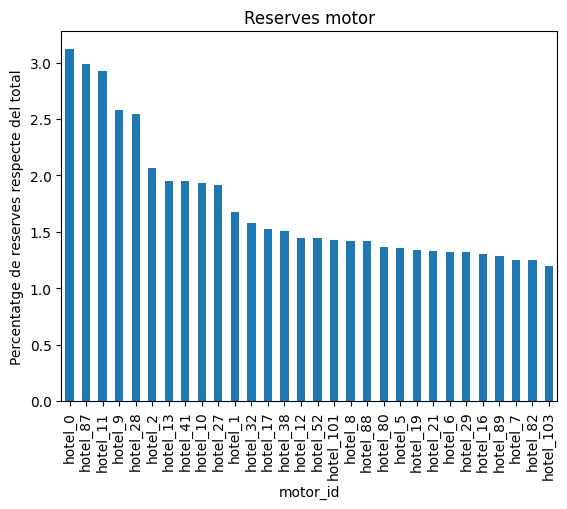

In [21]:
# Anem a analitzar els diferents valors de motor i en fem un plot
print(len(df.motor.unique()))
print(sum(df.motor.value_counts())/len(df.motor.unique()))
# Preparem les dades per fer percentatges
motor_counts = df['motor'].value_counts()
percentages = (motor_counts / motor_counts.sum()) * 100
# Plotejem els valors dels 10 motors i el percentatge que representen
percentages.head(30).plot(kind='bar')
plt.title('Reserves motor')
plt.xlabel('motor_id')
plt.ylabel('Percentatge de reserves respecte del total')
# plt.savefig('IMG/Top_30_motors.jpg')
plt.show()

Columna <code>booking_date</code>:

In [22]:
print(df.booking_date.describe())


count                           391579
mean     2022-11-28 07:38:01.589697024
min                2021-01-01 10:16:42
25%                2022-07-03 18:32:06
50%                2023-01-08 10:18:36
75%                2023-06-02 11:38:38
max                2023-10-31 23:50:54
Name: booking_date, dtype: object


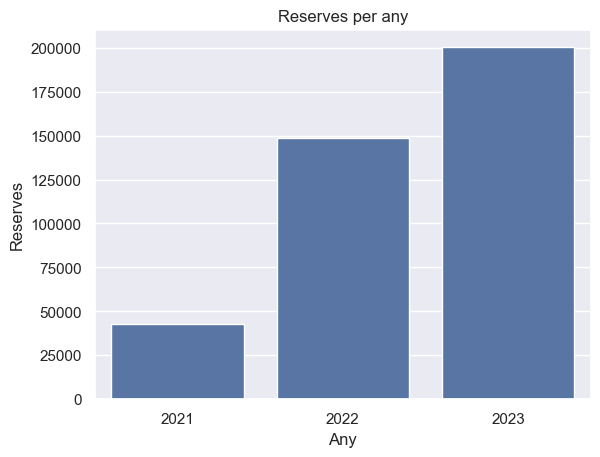

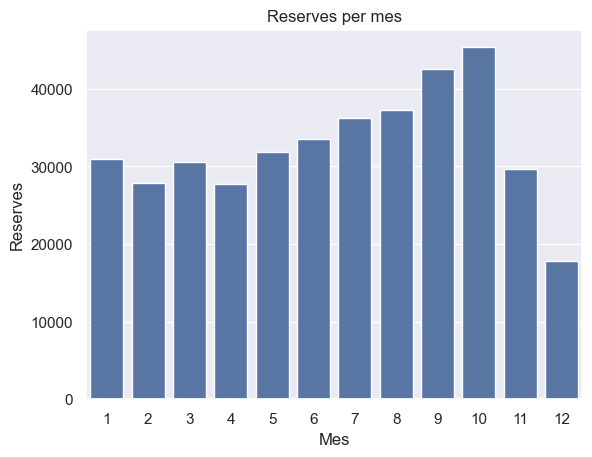

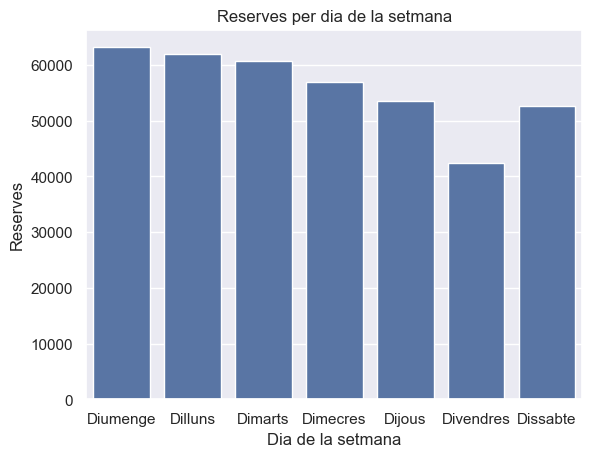

In [23]:
# plorejem amb seaborn les dades de booking_date agregades per any+
sns.set_theme(style="darkgrid")
sns.countplot(x=df.booking_date.dt.year, data=df)
plt.title('Reserves per any')
plt.xlabel('Any')
plt.ylabel('Reserves')
# plt.savefig('IMG/Reserves_per_any.jpg')
plt.show()

# Ara farem el mateix agregant per mes
sns.countplot(x=df.booking_date.dt.month, data=df)
plt.title('Reserves per mes')
plt.xlabel('Mes')
plt.ylabel('Reserves')
# plt.savefig('IMG/Reserves_per_mes.jpg')

plt.show()

# Finalment fem el mateix agregant per dia de la setmana
sns.countplot(x=df.booking_date.dt.dayofweek, data=df)
plt.title('Reserves per dia de la setmana')
plt.xlabel('Dia de la setmana')
plt.ylabel('Reserves')
# Fem que en l'eix x apareguin els dies de la setmana
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Diumenge','Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte'])
# plt.savefig('IMG/Reserves_per_dow.jpg')
plt.show()


Estudi dels camps <code>check_in</code> & <code>check_out</code>:

In [24]:
print(df.check_in.describe())
print(df.check_out.describe())

count                           391579
mean     2023-01-11 04:58:33.957592320
min                2021-01-01 00:00:00
25%                2022-08-07 00:00:00
50%                2023-02-19 00:00:00
75%                2023-07-23 00:00:00
max                2024-12-27 00:00:00
Name: check_in, dtype: object
count                           391579
mean     2023-01-13 16:06:37.676075520
min                2021-01-02 00:00:00
25%                2022-08-10 00:00:00
50%                2023-02-21 00:00:00
75%                2023-07-26 00:00:00
max                2024-12-31 00:00:00
Name: check_out, dtype: object


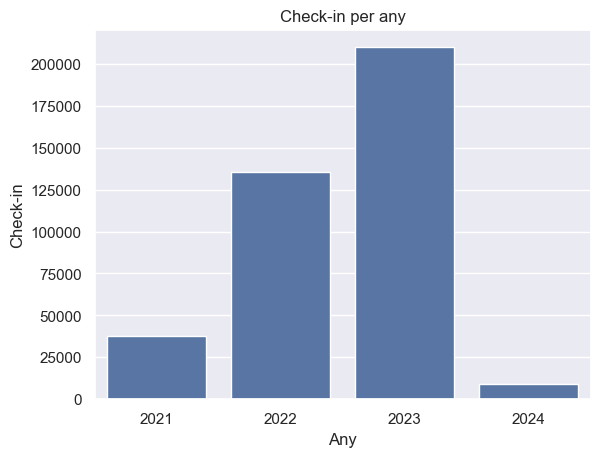

FileNotFoundError: [Errno 2] No such file or directory: 'IMG/ci_per_mes.jpg'

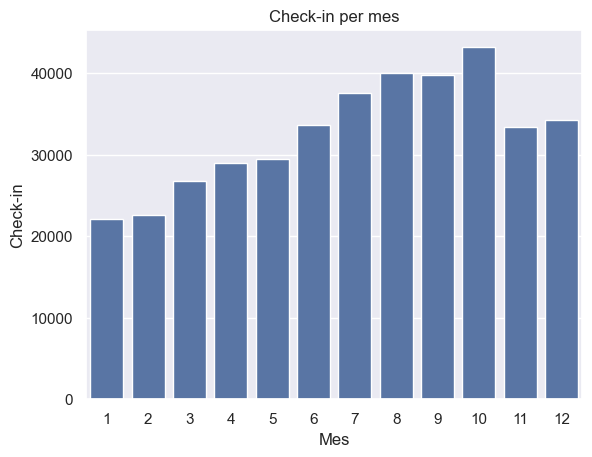

In [25]:
# plorejem amb seaborn les dades de booking_date agregades per any
sns.set_theme(style="darkgrid")
sns.countplot(x=df.check_in.dt.year, data=df)
# També plotegem el check-out per any en el mateix gràfic
plt.title('Check-in per any')
plt.xlabel('Any')
plt.ylabel('Check-in')
# plt.savefig('IMG/ci_per_any.jpg')
plt.show()

# Ara farem el mateix agregant per mes
sns.countplot(x=df.check_in.dt.month, data=df)
plt.title('Check-in per mes')
plt.xlabel('Mes')
plt.ylabel('Check-in')
plt.savefig('IMG/ci_per_mes.jpg')

plt.show()

# Finalment fem el mateix agregant per dia de la setmana
sns.countplot(x=df.check_in.dt.dayofweek, data=df)
plt.title('Check-in per dia de la setmana')
plt.xlabel('Dia de la setmana')
plt.ylabel('Check-in')
# Fem que en l'eix x apareguin els dies de la setmana
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte','Diumenge'])
# plt.savefig('IMG/ci_per_dow.jpg')
plt.show()


# plorejem amb seaborn les dades de booking_date agregades per any
sns.set_theme(style="darkgrid")
sns.countplot(x=df.check_out.dt.year, data=df)
# També plotegem el check-out per any en el mateix gràfic
plt.title('Check-out per any')
plt.xlabel('Any')
plt.ylabel('Check-out')
# plt.savefig('IMG/co_per_any.jpg')
plt.show()

# Ara farem el mateix agregant per mes
sns.countplot(x=df.check_out.dt.month, data=df)
plt.title('Check-out per mes')
plt.xlabel('Mes')
plt.ylabel('Check-out')
# plt.savefig('IMG/co_per_mes.jpg')

plt.show()

# Finalment fem el mateix agregant per dia de la setmana
sns.countplot(x=df.check_out.dt.dayofweek, data=df)
plt.title('Check-out per dia de la setmana')
plt.xlabel('Dia de la setmana')
plt.ylabel('Check-out')
# Fem que en l'eix x apareguin els dies de la setmana
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte','Diumenge'])
# plt.savefig('IMG/co_per_dow.jpg')
plt.show()



Estudi dels camps <code>unidades</code>, <code>pax</code>, i <code>noches</code>:

In [26]:
# Estudi dels camps unidades, pax i noches, anem a mirar quins valors tenen
print(df[['unidades','pax','noches']].describe())

            unidades            pax         noches
count  391579.000000  391579.000000  391579.000000
mean        1.002738       2.119741       2.463929
std         0.066680       0.862518       1.881829
min         1.000000       1.000000       0.000000
25%         1.000000       2.000000       1.000000
50%         1.000000       2.000000       2.000000
75%         1.000000       2.000000       3.000000
max         6.000000      16.000000      91.000000


Estudi dels camps <code>linea_de_inventario</code>, <code>tipo_alojamiento</code>, <code>ocupacion</code>, <code>pension</code>:

In [27]:
df[['linea_de_inventario','tipo_alojamiento','ocupacion','pension']].sample(5)

,linea_de_inventario,tipo_alojamiento,ocupacion,pension
17465,familiar_3a_HD_tf,familiar,3a,HD
141236,ST_2a_SA_EB1,ST,2a,SA
22562,JUN_2a_HD_cg,JUN,2a,HD
312991,doble_1a_SA_tf,doble,1a,SA
211232,cuadruple_3a_HD_sf,cuadruple,3a,HD


In [28]:
print(df.ocupacion.value_counts()[:2])
print(df.pension.value_counts()[:20])

ocupacion
2a    256497
1a     65381
Name: count, dtype: int64
pension
SA    210896
HD    177950
MP      2438
CO       279
PC        15
TI         1
Name: count, dtype: int64


In [29]:
df.tipo_alojamiento.value_counts()[:5]

tipo_alojamiento
doble        107280
ST            53418
cuadruple     24784
doblesup      22160
petit         11970
Name: count, dtype: int64

In [30]:
# El primer que fem es un drop de la columna linea_de_inventario perque no ens aporta res
df.drop('linea_de_inventario', axis=1, inplace=True)
# Ara crearem 3 columnes noves, una per num adult, una per num nens i una per num bebes
# Per trobar els numeros utilitzarem ReGex. Na seran N adults, Nn seran N nens i Nb seran N bebes
df['num_adult'] = df.ocupacion.str.extract(r'(\d*)a')
df['num_nens'] = df.ocupacion.str.extract(r'(\d*)n')
df['num_nadons'] = df.ocupacion.str.extract(r'(\d*)b')
# Convertim els NaNs a 0
df['num_adult'] = df['num_adult'].fillna(0).astype(int)
df['num_nens'] = df['num_nens'].fillna(0).astype(int)
df['num_nadons'] = df['num_nadons'].fillna(0).astype(int)
# Ja podem fer un drop de la columna ocupacion
df.drop('ocupacion', axis=1, inplace=True)

Estudi del camp <code>estado_reserva</code>:

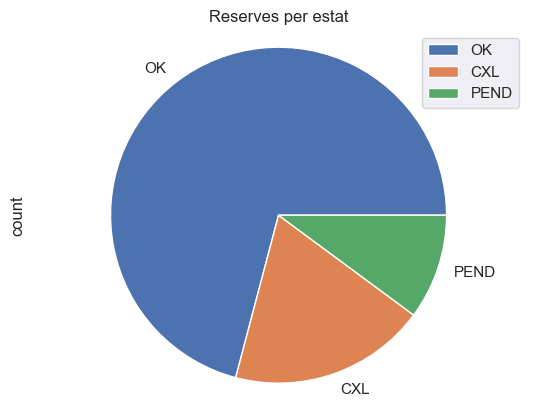

In [31]:
df.estado_reserva.value_counts()
# plotegem els valors de estado_reserva amb percentatges i amb un grafic tipus pie
estado_reserva_counts = df.estado_reserva.value_counts()
percentages = (estado_reserva_counts / estado_reserva_counts.sum()) * 100
percentages.head(30).plot(kind='pie')
plt.title('Reserves per estat')
# Fem que es mostri el percentatge de cada estat de reserva
plt.legend(labels=percentages.index, loc="best")
plt.axis('equal')

# Guardem el grafic
# plt.savefig('IMG/Reserves_per_estat.jpg')
plt.show()

In [32]:
print(percentages)

estado_reserva
OK      70.891187
CXL     18.980078
PEND    10.128735
Name: count, dtype: float64


In [33]:
# Agafem només el subgrup que té estat de reserva PEND
df_pend = df[df.estado_reserva == 'PEND']
df_pend.head()

,motor,booking_id,t_booking_id,booking_date,check_in,check_out,unidades,pax,noches,estado_reserva,importe_total,deposito,divisa,tipo_pago,estado_email_cliente,estado_email_hotel,noches_habitacion,ultima_mod,tipo_alojamiento,pension,antelacion_dias,extras,promociones,pais,motivo_cancelacion,fecha_cancelacion,tipo_organizacion,reserva_combinada,origin,mode,codigos_promocionales,fidelizada,no_show,num_adult,num_nens,num_nadons
96,hotel_36,263258.01,263258,2021-12-31 03:43:08,2022-01-07,2022-01-09,1,2,2,PEND,180.00,54.0,EUR,pos,NaN,NaN,2,NaT,A1H_SUP_4o2a,SA,7,NaN,False,ES,NaN,NaT,NaN,False,NaN,NaN,False,False,NONE,2,0,0
114,hotel_36,103503.01,103503,2021-12-30 22:59:21,2022-11-01,2022-11-06,1,2,5,PEND,590.00,177.0,EUR,pos,NaN,NaN,5,NaT,A1H_1o1a,SA,306,NaN,False,RU,NaN,NaT,NaN,False,NaN,NaN,False,False,NONE,2,0,0
199,hotel_16,183305.01,183305,2021-12-30 14:06:04,2021-12-31,2022-01-01,1,2,1,PEND,380.95,0.0,EUR,pos,NaN,NaN,1,NaT,CA2021GI,MP,1,NaN,True,ES,NaN,NaT,NaN,False,NaN,NaN,False,False,NONE,2,0,0
385,hotel_6,285211.01,285211,2021-12-29 14:45:44,2022-01-02,2022-01-05,1,2,3,PEND,152.00,0.0,EUR,pay_no_pain_v2,NaN,NaN,3,NaT,EstInt,SA,4,NaN,True,ES,NaN,NaT,NaN,False,NaN,NaN,False,False,NONE,2,0,0
502,hotel_37,225285.01,225285,2021-12-28 18:42:55,2021-12-29,2021-12-31,1,2,2,PEND,145.35,0.0,EUR,pay_no_pain_v2,NaN,NaN,2,NaT,DblSt,SA,1,NaN,True,CH,NaN,NaT,NaN,False,NaN,NaN,False,False,NONE,2,0,0


In [34]:
estado_reserva_counts

estado_reserva
OK      277595
CXL      74322
PEND     39662
Name: count, dtype: int64

Estudi dels camps <code>importe_total</code> i <code>deposito</code>:

count    391579.000000
mean        455.880990
std         522.981781
min          -0.010000
25%         160.830000
50%         304.000000
75%         555.900000
max       24615.040000
Name: importe_total, dtype: float64


Text(0, 0.5, 'Import mitjà')

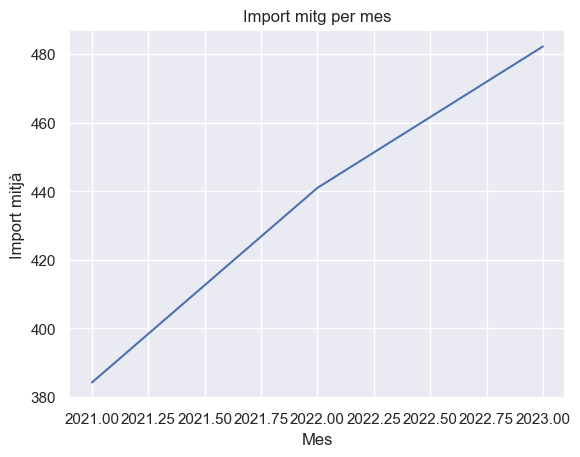

In [35]:
# Ara estudiem els camps importe_total i deposito,
# Mirarem quina és la distribució dels valors i quin percentatge de reserves tenen dipòsit
print(df.importe_total.describe())

# plotegem els valors de importe_total en funció de les dates de reserva
df.groupby(df.booking_date.dt.year).importe_total.mean().plot(kind='line')
plt.title('Import mitg per mes')
plt.xlabel('Mes')
plt.ylabel('Import mitjà')
# plt.savefig('IMG/Import_mitjà_per_mes.jpg')



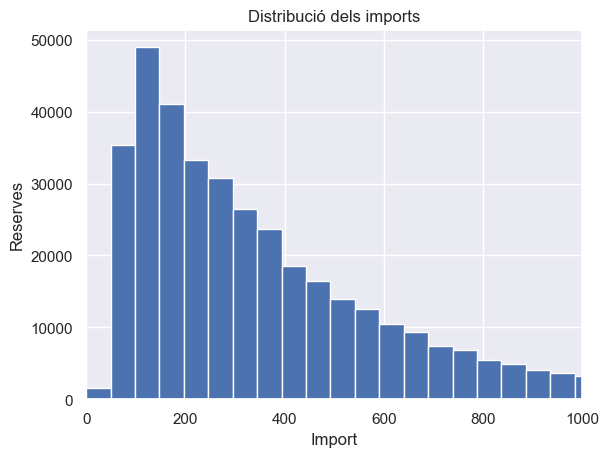

In [36]:
# També mirarem amb un histograma com es distribueixen els valors de importe_total
df.importe_total.hist(bins=500)
plt.title('Distribució dels imports')
plt.xlabel('Import')
plt.ylabel('Reserves')
# Fem que vagin entre 0 i 1000
plt.xlim(0,1000)
# plt.savefig('IMG/Import_total_hist.jpg')
plt.show()


In [37]:
# Ara mirem en quin percentatge de reserves hi ha dipòsit
print(df.deposito.describe())
# print(df.deposito.value_counts())

count    391579.000000
mean         60.460683
std         260.287431
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       21530.000000
Name: deposito, dtype: float64


In [38]:
deposito = df.deposito.value_counts()
deposito[0]/df.deposito.shape[0]

0.871070716253936

Estudi del camp <code>divisa</code> i <code>tipo_pago</code>:

In [39]:
divisas = df.divisa.value_counts()
divisas

divisa
EUR    391576
USD         3
Name: count, dtype: int64

In [40]:
df.divisa.isna().sum()

0

Estudi dels camps <code>estado_email_cliente</code> i <code>estado_email_hotel</code>:

In [41]:
print(df.estado_email_cliente.value_counts())
df.estado_email_cliente.isna().sum()

estado_email_cliente
OPEN           233547
CLICK           44663
SEND            36278
HARD_BOUNCE      1517
SOFT_BOUNCE      1363
INVALID           241
DEFERRAL           28
QUEUED             17
SPAM                3
Name: count, dtype: int64


73922

In [42]:
print(df.estado_email_hotel.value_counts())
df.estado_email_hotel.isna().sum()

estado_email_hotel
SEND           229742
OPEN            73787
INVALID          2954
CLICK            1766
SOFT_BOUNCE        65
DEFERRAL           41
HARD_BOUNCE        18
QUEUED              9
Name: count, dtype: int64


83197

Estudi del camp <code>pais</code>:

In [43]:
print(df.pais.value_counts()[:5])
df.pais.isna().sum()

pais
ES    207971
US     38147
FR     20528
GB     15074
DE     10753
Name: count, dtype: int64


1463

Estudi dels camps <code>motivo cancelacion</code> i <code>fecha_cancelacion</code>:

In [44]:
print(df.motivo_cancelacion.value_counts())
df.motivo_cancelacion.shape[0]- df.motivo_cancelacion.isna().sum()


motivo_cancelacion
OTROS            67199
CAMBIO FECHAS     2390
ANULACIÓN          954
ENFERMEDAD         789
COVID-19           523
Name: count, dtype: int64


71855

In [45]:
print(df.fecha_cancelacion.value_counts())
df.fecha_cancelacion.shape[0]- df.motivo_cancelacion.isna().sum()


fecha_cancelacion
2023-08-28 12:01:00    4
2023-08-03 00:01:21    3
2023-08-14 00:01:20    3
2023-08-05 07:30:49    2
2023-08-02 21:01:20    2
                      ..
2022-08-04 07:57:16    1
2022-10-17 19:34:40    1
2022-10-17 19:31:42    1
2022-10-17 20:00:26    1
2023-06-11 00:52:57    1
Name: count, Length: 71907, dtype: int64


71855

Hem parlat amb els programadors i he descobert que el camp <code>mode</code> en realitat es tracta de la versió del motor, per això canviem el type a string.

In [46]:
df['mode'] = df['mode'].astype(str)

#### Neteja i verificació de les dades:

In [47]:
# Eliminem tots els registres que tinguin check_in majors que df.booking_date.max()
df_clean = df[df.check_in <= df.booking_date.max()]
df_clean.shape

(363163, 36)

In [48]:
# Ara fem un drop de totes les que a status tinguin PEND
df_clean = df_clean[df_clean.estado_reserva != 'PEND']
# Creem una nova columna amb un boolea, si és CXL serà True, si no False
df_clean['cancelada'] = df_clean.estado_reserva == 'CXL'

In [49]:
drops = ['ultima_mod', 'motivo_cancelacion', 'fecha_cancelacion', 'booking_id', 't_booking_id', 'pax', 'no_show', 'estado_reserva']
df_clean.drop(drops, axis=1, inplace=True)

In [50]:
# Repassem quins camps tenen valors sense sentit
df_clean.isna().sum()

motor                         0
booking_date                  0
check_in                      0
check_out                     0
unidades                      0
noches                        0
importe_total                 0
deposito                      0
divisa                        0
tipo_pago                     0
estado_email_cliente      31850
estado_email_hotel        40720
noches_habitacion             0
tipo_alojamiento              0
pension                       0
antelacion_dias               0
extras                   283018
promociones                   0
pais                       1226
tipo_organizacion        320144
reserva_combinada             0
origin                   248579
mode                          0
codigos_promocionales         0
fidelizada                    0
num_adult                     0
num_nens                      0
num_nadons                    0
cancelada                     0
dtype: int64

In [51]:
print(df_clean[df_clean.origin.isna()].info())

<class 'pandas.core.frame.DataFrame'>
Index: 248579 entries, 0 to 391578
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   motor                  248579 non-null  object        
 1   booking_date           248579 non-null  datetime64[ns]
 2   check_in               248579 non-null  datetime64[ns]
 3   check_out              248579 non-null  datetime64[ns]
 4   unidades               248579 non-null  int64         
 5   noches                 248579 non-null  int64         
 6   importe_total          248579 non-null  float64       
 7   deposito               248579 non-null  float64       
 8   divisa                 248579 non-null  object        
 9   tipo_pago              248579 non-null  object        
 10  estado_email_cliente   228890 non-null  object        
 11  estado_email_hotel     221940 non-null  object        
 12  noches_habitacion      248579 non-null  int64    

In [52]:
# Al camp origin el passem a minuscules
df_clean['origin'] = df_clean['origin'].str.lower()

In [53]:
list(df_clean.columns)

['motor',
 'booking_date',
 'check_in',
 'check_out',
 'unidades',
 'noches',
 'importe_total',
 'deposito',
 'divisa',
 'tipo_pago',
 'estado_email_cliente',
 'estado_email_hotel',
 'noches_habitacion',
 'tipo_alojamiento',
 'pension',
 'antelacion_dias',
 'extras',
 'promociones',
 'pais',
 'tipo_organizacion',
 'reserva_combinada',
 'origin',
 'mode',
 'codigos_promocionales',
 'fidelizada',
 'num_adult',
 'num_nens',
 'num_nadons',
 'cancelada']

In [54]:
# Fem un filtre i seleccionem només les dades on importe_total sigui més gran que 0
df_clean = df_clean[df_clean.importe_total > 0]
df_clean = df_clean[df_clean.noches > 0]

Verifiquem que les dades siguin les adequades

In [55]:
df_clean.motor.dtype

dtype('O')

In [56]:
# Ara comprovem que totes les columnes tinguin els valors esperats
assert df_clean['cancelada'].isna().sum() == 0
# Definim un tipus de dades per a cada columna
column_types = {'motor': 'object',
 'booking_date' : 'datetime64[ns]',
 'check_in' : 'datetime64[ns]',
 'check_out' : 'datetime64[ns]',
 'unidades' : 'int64',
 'noches' : 'int64',
 'importe_total' : 'float64',
 'deposito' : 'float64',
 'divisa' : 'object',
 'tipo_pago' : 'object',
 'estado_email_cliente' : 'object',
 'estado_email_hotel' : 'object',
 'noches_habitacion' : 'int64',
 'tipo_alojamiento' : 'object',
 'pension' : 'object',
 'antelacion_dias' : 'int64',
 'extras' : 'object',
 'promociones' : 'bool',
 'pais' : 'object',
 'tipo_organizacion' : 'object',
 'reserva_combinada' : 'bool',
 'origin' : 'object',
 'mode' : 'object', 
 'codigos_promocionales' : 'bool', 
 'fidelizada' : 'bool',
 'num_adult' : 'int32',
 'num_nens' : 'int32',
 'num_nadons' : 'int32',
 'cancelada' : 'bool'}
# Comprovem que totes les columnes tinguin els valors esperats
for column_type in column_types:
    try:
        assert df_clean[column_type].dtype == column_types[column_type]
    except:
        print(column_type, df_clean[column_type].dtype, column_types[column_type])
        raise 

#### Estudi correlacions
Seguim amb l'estudi de les columnes i les seves correlacions:

In [57]:
#  Fem un pairplot per veure les correlacions entre les variables i la columna cancelada
# Perque es pugui veure millor, només agafem un subconjunt de les dades
# Aquest pairplot el farem amb histogrames, per veure les distribucions de les variables
# sns.pairplot(df_clean[['importe_total', 'deposito', 'noches_habitacion', 'promociones', 'pais','cancelada']], hue='cancelada', diag_kind='hist')
# sns.pairplot(df_clean[['importe_total', 'deposito', 'noches_habitacion', 'promociones', 'pais','cancelada']], hue='cancelada')


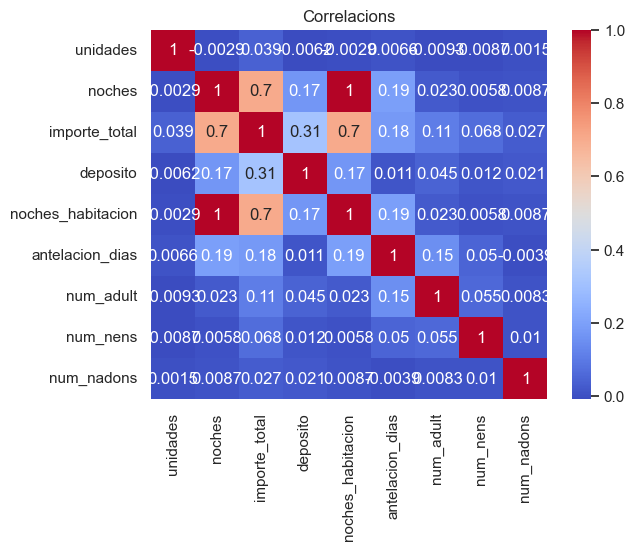

In [58]:
# També fem la matrix de correlacions
# Agafem nomes els camps que tenen valors numerics
df_clean_num = df_clean.select_dtypes(include=['float64', 'int64', 'int32'])
sns.heatmap(df_clean_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlacions')
# plt.savefig('IMG/Correlacions.jpg')
plt.show()

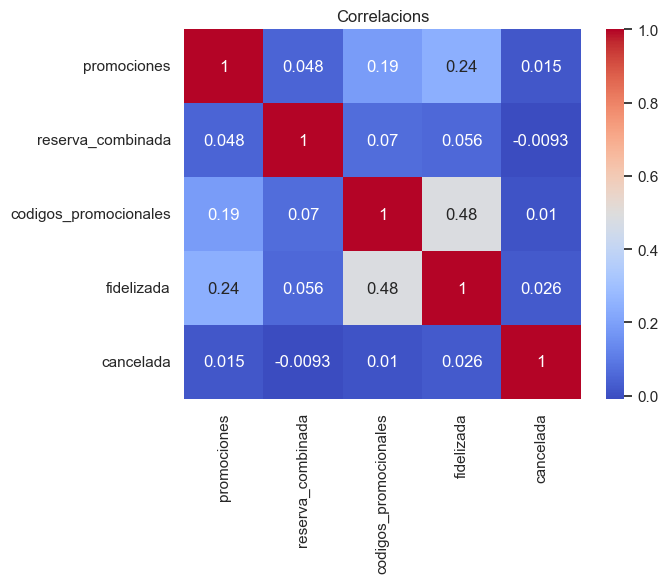

In [60]:
# Fem drop de les columnes noches_habitacion i deposito perque tenen una correlació molt alta amb noches
df_clean_num = df_clean.select_dtypes(include=['bool'])
sns.heatmap(df_clean_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlacions')
# plt.savefig('IMG/Correlacions_bool.jpg')
plt.show()

#### Normalització de les dades:

In [61]:
# El primer que farem serà crear una columna avg_price_night que serà el importe_total dividit per noches_habitacion
df_clean['avg_price_night'] = df_clean.importe_total / df_clean.noches_habitacion
# I ara farem un drop de les columnes importe_total, noches i noches_habitacion
drop = ['importe_total', 'noches', 'noches_habitacion', 'deposito']
df_clean.drop(drop, axis=1, inplace=True)



In [62]:
df_clean.avg_price_night.max()

3125.0

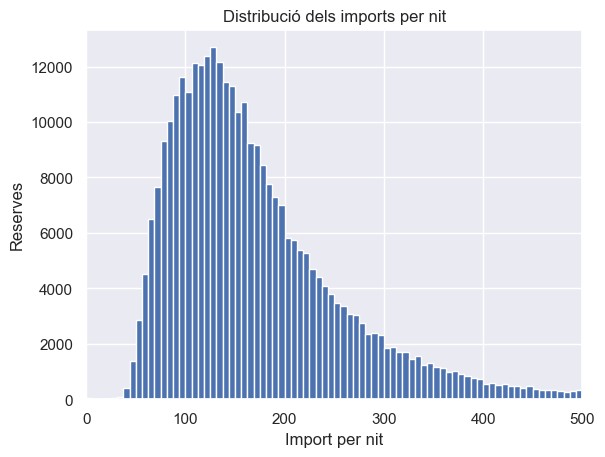

In [63]:
# Plotejem la distribució de avg_price_night
df_clean.avg_price_night.hist(bins=500)
plt.title('Distribució dels imports per nit')
plt.xlabel('Import per nit')
plt.ylabel('Reserves')
# Posem un limit a l'eix x perque es vegi millor
plt.xlim(0,500)

# plt.savefig('IMG/Import_per_nit.jpg')
plt.show()

In [64]:
# Anem a normalitzar aquest camp, ho farem amb una normalització per la desviació estàndard
# Primer calculem la mitjana i la desviació estàndard
avg_price_night_mean = df_clean.avg_price_night.mean()
avg_price_night_std = df_clean.avg_price_night.std()
# Ara normalitzem
df_clean['avg_price_night_norm'] = (df_clean.avg_price_night - avg_price_night_mean) / avg_price_night_std


In [65]:
# Ara normalitzem per màx els camps: antelacion_dias, num_adult, num_nens, num_nadons
# Primer calculem el màxim
unidades_max = df_clean.unidades.max()
# antelacion_dias_max = df_clean.antelacion_dias.max()
num_adult_max = df_clean.num_adult.max()
num_nens_max = df_clean.num_nens.max()
num_nadons_max = df_clean.num_nadons.max()
# Ara normalitzem
df_clean['unidades_norm'] = df_clean.unidades / unidades_max
# df_clean['antelacion_dias_norm'] = df_clean.antelacion_dias / antelacion_dias_max
df_clean['num_adult_norm'] = df_clean.num_adult / num_adult_max
df_clean['num_nens_norm'] = df_clean.num_nens / num_nens_max
df_clean['num_nadons_norm'] = df_clean.num_nadons / num_nadons_max


In [66]:
# Ara farem un drop de les columnes antelacion_dias, num_adult, num_nens, num_nadons i avg_price_night
drop = ['unidades', 'num_adult', 'num_nens', 'num_nadons', 'avg_price_night'] # antelacion_dias
df_clean.drop(drop, axis=1, inplace=True)


In [67]:
df_clean.select_dtypes(include=['float64', 'int64', 'int32']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 325437 entries, 0 to 391578
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   antelacion_dias       325437 non-null  int64  
 1   avg_price_night_norm  325437 non-null  float64
 2   unidades_norm         325437 non-null  float64
 3   num_adult_norm        325437 non-null  float64
 4   num_nens_norm         325437 non-null  float64
 5   num_nadons_norm       325437 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 17.4 MB


In [68]:
df_clean['num_nens_norm'].value_counts()

num_nens_norm
0.000    297688
0.125     15763
0.250     11156
0.375       756
0.500        70
0.625         2
0.750         1
1.000         1
Name: count, dtype: int64

#### Discretització de les dades:
Comencem amb la discretització estudiant la variable <code>avg_price_night_norm</code>:

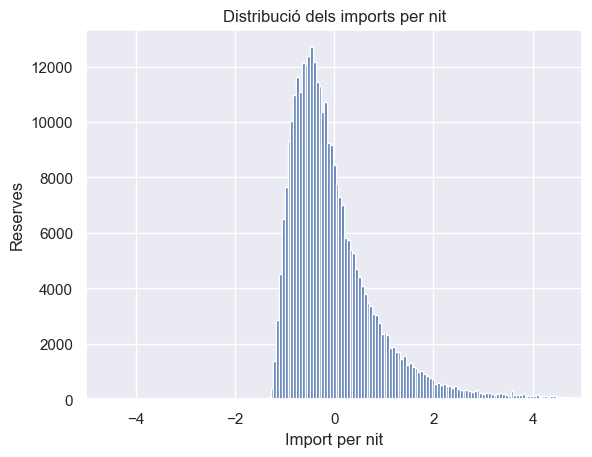

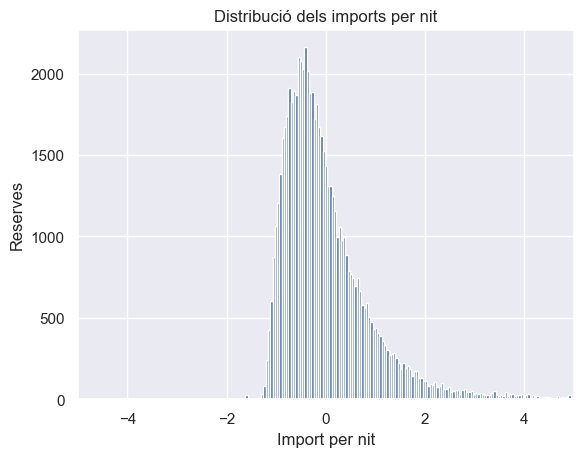

In [69]:
# Recordem que hem normaitzat el camp i que l'hem centrat en el 0, 
df_clean.avg_price_night_norm.hist(bins=500)
plt.title('Distribució dels imports per nit')
plt.xlabel('Import per nit')
plt.ylabel('Reserves')
# Posem un limit a l'eix x perque es vegi millor
plt.xlim(-5,5)
plt.show()
# Ara farem el mateix plot però només amb les reserves cancelades
df_clean[df_clean.cancelada].avg_price_night_norm.hist(bins=500)
plt.title('Distribució dels imports per nit')
plt.xlabel('Import per nit')
plt.ylabel('Reserves')
# Posem un limit a l'eix x perque es vegi millor
plt.xlim(-5,5)
plt.show()

In [70]:
# Ara trencarem la variable per quartils,
# Primer calculem els quartils, 
quartil_1 = df_clean.avg_price_night_norm.quantile(0.25)
quartil_2 = df_clean.avg_price_night_norm.quantile(0.5)
quartil_3 = df_clean.avg_price_night_norm.quantile(0.75)
# Ara creem la columna avg_price_night_quartil
print(quartil_1, quartil_2, quartil_3)
# Creem una funció que ens retorni el quartil al que pertany un valor, 
# farem que els resultats estiguin entre 0 i 1 per tal de que tingui sentit amb la resta del df
def quartil(value):
    if value < quartil_1:
        return 0
    elif value < quartil_2:
        return 1/3
    elif value < quartil_3:
        return 2/3
    else:
        return 1

# Ara apliquem la funció a la columna avg_price_night_norm
df_clean['avg_price_night_disc'] = df_clean.avg_price_night_norm.apply(quartil)


-0.6327141218863754 -0.24611166954297187 0.3309646535641653


In [71]:
# Ara anem a discretitzar el camp antelacion_dias,
# En aquest cas farem 3 grups, els que reserven amb menys de 7 dies d'antelació, els que reserven entre 7 i 30 dies i els que reserven amb més de 30 dies
print(df_clean.antelacion_dias.describe())
# Creem una funció que ens retorni el grup al que pertany un valor,
# farem que els resultats estiguin entre 0 i 1 per tal de que tingui sentit amb la resta del df
def antelacion_dias_group(value):
    if value < 7:
        return 0
    elif value < 30:
        return 1/2
    else:
        return 1

# Ara apliquem la funció a la columna antelacion_dias
df_clean['antelacion_dias_disc'] = df_clean.antelacion_dias.apply(antelacion_dias_group)

count    325437.000000
mean         39.343132
std          50.447346
min          -1.000000
25%           5.000000
50%          20.000000
75%          54.000000
max         542.000000
Name: antelacion_dias, dtype: float64


In [72]:
df_clean.head()
# Ara per cal treure les columnes que hem discretitzat per tal de que no hi hagi correlacions
drop = ['antelacion_dias', 'avg_price_night_norm']
df_clean.drop(drop, axis=1, inplace=True)

In [73]:
# Agafem totes les columnes de tipus object
df_clean.select_dtypes(include=['object']).info()
# Ara farem una funció que agafi els camps en object, i els hi associi un valor numèric discret
def discretització_columna_object(df, columna):
    """
    Aquesta funció pren un DataFrame de pandas i el nom d'una columna com a paràmetres i retorna una nova columna
    amb els valors de la columna original discretitzats.

    :param df: DataFrame de pandas amb les dades
    :param columna: Nom de la columna que es vol discretitzar
    :return: Nova columna amb els valors discretitzats
    """
    valors = df[columna].unique()
    diccionari = {i/len(valors):valor for i, valor in enumerate(valors)}
    return df[columna].apply(lambda x: list(diccionari.keys())[list(diccionari.values()).index(x)])
# recorre totes les columnes de tipus object i les discretitza
for columna in df_clean.select_dtypes(include=['object']).columns:
    df_clean[columna+'_disc'] = discretització_columna_object(df_clean, columna)
# Ara farem un drop de les columnes originals
df_clean.drop(df_clean.select_dtypes(include=['object']).columns, axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 325437 entries, 0 to 391578
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   motor                 325437 non-null  object
 1   divisa                325437 non-null  object
 2   tipo_pago             325437 non-null  object
 3   estado_email_cliente  293732 non-null  object
 4   estado_email_hotel    284893 non-null  object
 5   tipo_alojamiento      325437 non-null  object
 6   pension               325437 non-null  object
 7   extras                42797 non-null   object
 8   pais                  324215 non-null  object
 9   tipo_organizacion     5740 non-null    object
 10  origin                77250 non-null   object
 11  mode                  325437 non-null  object
dtypes: object(12)
memory usage: 32.3+ MB


In [74]:
# Ara fem el mateix per les columnes de tipus bool
df_clean.select_dtypes(include=['bool']).info()
# recorre totes les columnes de tipus bool i les discretitza
# al valor True li assigna 1 i al False li assigna 0
for columna in df_clean.select_dtypes(include=['bool']).columns:
    df_clean[columna+'_disc'] = df_clean[columna].apply(lambda x: 1 if x else 0)
# Ara farem un drop de les columnes originals
df_clean.drop(df_clean.select_dtypes(include=['bool']).columns, axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 325437 entries, 0 to 391578
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   promociones            325437 non-null  bool 
 1   reserva_combinada      325437 non-null  bool 
 2   codigos_promocionales  325437 non-null  bool 
 3   fidelizada             325437 non-null  bool 
 4   cancelada              325437 non-null  bool 
dtypes: bool(5)
memory usage: 4.0 MB


In [75]:
df_clean.head()

,booking_date,check_in,check_out,unidades_norm,num_adult_norm,num_nens_norm,num_nadons_norm,avg_price_night_disc,antelacion_dias_disc,motor_disc,divisa_disc,tipo_pago_disc,estado_email_cliente_disc,estado_email_hotel_disc,tipo_alojamiento_disc,pension_disc,extras_disc,pais_disc,tipo_organizacion_disc,origin_disc,mode_disc,promociones_disc,reserva_combinada_disc,codigos_promocionales_disc,fidelizada_disc,cancelada_disc
0,2021-12-31 23:45:23,2022-01-12,2022-01-14,0.166667,0.166667,0.0,0.0,0.000000,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,1,0
1,2021-12-31 23:41:53,2022-09-03,2022-09-04,0.166667,0.166667,0.0,0.0,0.666667,1.0,0.006757,0.0,0.111111,0.0,0.000000,0.002062,0.166667,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0,1
2,2021-12-31 22:26:53,2022-04-12,2022-04-19,0.166667,0.166667,0.0,0.0,0.666667,1.0,0.013514,0.0,0.111111,0.1,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0,0
3,2021-12-31 22:17:05,2022-01-12,2022-01-16,0.166667,0.166667,0.0,0.0,1.000000,0.5,0.020270,0.0,0.222222,0.0,0.111111,0.004124,0.000000,0.001326,0.004762,0.0,0.0,0.0,0,0,0,0,0
4,2021-12-31 22:17:05,2022-01-12,2022-01-16,0.166667,0.166667,0.0,0.0,1.000000,0.5,0.020270,0.0,0.222222,0.1,0.111111,0.004124,0.000000,0.001326,0.004762,0.0,0.0,0.0,0,0,0,0,0


#### SVD
Ara farem el procés de descomposició, SVD

Per a poder dur a terme aquest procés cal que totes les dades tinguin valors del tipus numèric, per això hem de convertir les columnes que tenen valors de tipus datetime o enters en números reals. El datetime el passarem al format ISO que ens dona el nombre de nanosegons transcorreguts des de l'1 de gener de 1970, a més normalitzarem les dades per a que estiguin entre 0 i 1.

In [76]:
# Comencem a preparar les dades, canviem els datetime a int
df_clean.booking_date = df_clean.booking_date.astype('int64')
df_clean.check_in = df_clean.check_in.astype('int64')
df_clean.check_out = df_clean.check_out.astype('int64')
# Ara normalitzem aquestes mateixes columnes entre 0 i 1
df_clean.booking_date = df_clean.booking_date / df_clean.booking_date.max()
df_clean.check_in = df_clean.check_in / df_clean.check_in.max()
df_clean.check_out = df_clean.check_out / df_clean.check_out.max()

# Ara tots els camps enters els passem a float menys cancelada_disc
df_clean[df_clean.select_dtypes(include=['int64', 'int32']).columns] = df_clean[df_clean.select_dtypes(include=['int64', 'int32']).columns].astype('float64')

df_clean.cancelada_disc = df_clean.cancelada_disc.astype('bool')

In [77]:
from sklearn.decomposition import TruncatedSVD

# El primer que farem serà posar a part la columna cancelada_disc
y = df_clean.cancelada_disc
# Ara fem un drop de la columna cancelada_disc
df_nocancel = df_clean.drop('cancelada_disc', axis=1)
svd = TruncatedSVD(n_components=12)  
svd.fit(df_nocancel)  # apliquem SVD
ve_12 = svd.explained_variance_ratio_.sum()  # Obtenim la variància explicada amb 12 components
transformed_df = svd.transform(df_nocancel)  # Obtenim les dades transformades
# Ara en un dataframe
transformed_df = pd.DataFrame(transformed_df)
# Ara afegim la columna cancelada_disc
transformed_df['cancelada_disc'] = y

In [80]:
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cancelada_disc
0,2.031680,0.368316,0.052780,-0.557792,-0.340067,0.606142,-0.016086,0.015989,-0.093848,-0.037153,-0.001118,-0.003071,False
1,2.174424,-0.460320,-0.361161,-0.286377,-0.340767,-0.239530,-0.147484,0.026288,-0.139202,-0.050404,-0.016367,-0.053330,True
2,2.172629,-0.459866,-0.361225,-0.284274,-0.337401,-0.238672,-0.162614,-0.001256,-0.054714,-0.056356,-0.047366,-0.083573,False
3,1.731913,-0.586360,-0.531569,0.053000,0.598717,0.055946,-0.352537,0.030912,-0.183676,-0.059567,0.023905,0.049716,False
4,1.735804,-0.586971,-0.531449,0.053221,0.603311,0.058584,-0.373468,0.003780,-0.101221,-0.066821,-0.004949,0.018081,False


In [81]:
df_nocancel = df_clean.drop('cancelada_disc', axis=1)
svd_25 = TruncatedSVD(n_components=df_nocancel.shape[1])  
svd_25.fit(df_nocancel)  # apliquem SVD
ve_25 = svd_25.explained_variance_ratio_.sum()


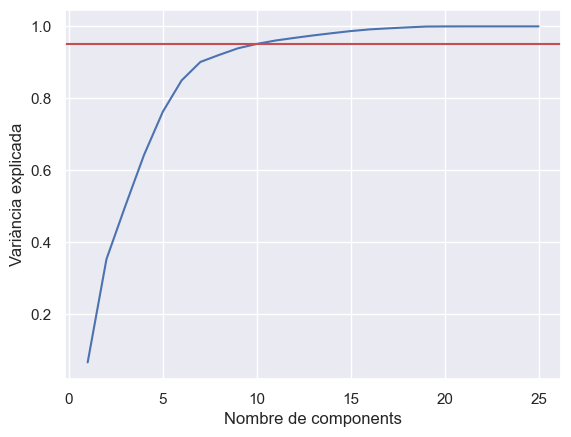

In [82]:
# Ara farem un plot de la variància explicada en funció del nombre de components
# Agafarem els valors de 1 a 25
variance_explained = []
for i in range(1, 26):
    svd = TruncatedSVD(n_components=i)
    svd.fit(df_nocancel)
    variance_explained.append(svd.explained_variance_ratio_.sum())
# I ara farem el plot
plt.plot(range(1, 26), variance_explained)
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada')
# plt.savefig('IMG/Variancia_explicada.jpg')
# Fem una linia en el valor de 0.95
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()

In [84]:
df_clean.head()

,booking_date,check_in,check_out,unidades_norm,num_adult_norm,num_nens_norm,num_nadons_norm,avg_price_night_disc,antelacion_dias_disc,motor_disc,divisa_disc,tipo_pago_disc,estado_email_cliente_disc,estado_email_hotel_disc,tipo_alojamiento_disc,pension_disc,extras_disc,pais_disc,tipo_organizacion_disc,origin_disc,mode_disc,promociones_disc,reserva_combinada_disc,codigos_promocionales_disc,fidelizada_disc,cancelada_disc
0,0.965976,0.966584,0.965654,0.166667,0.166667,0.0,0.0,0.000000,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
1,0.965976,0.978485,0.977492,0.166667,0.166667,0.0,0.0,0.666667,1.0,0.006757,0.0,0.111111,0.0,0.000000,0.002062,0.166667,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,True
2,0.965973,0.971161,0.970481,0.166667,0.166667,0.0,0.0,0.666667,1.0,0.013514,0.0,0.111111,0.1,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False
3,0.965973,0.966584,0.965756,0.166667,0.166667,0.0,0.0,1.000000,0.5,0.020270,0.0,0.222222,0.0,0.111111,0.004124,0.000000,0.001326,0.004762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.965973,0.966584,0.965756,0.166667,0.166667,0.0,0.0,1.000000,0.5,0.020270,0.0,0.222222,0.1,0.111111,0.004124,0.000000,0.001326,0.004762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [87]:
df_clean.describe()

,booking_date,check_in,check_out,unidades_norm,num_adult_norm,num_nens_norm,num_nadons_norm,avg_price_night_disc,antelacion_dias_disc,motor_disc,divisa_disc,tipo_pago_disc,estado_email_cliente_disc,estado_email_hotel_disc,tipo_alojamiento_disc,pension_disc,extras_disc,pais_disc,tipo_organizacion_disc,origin_disc,mode_disc,promociones_disc,reserva_combinada_disc,codigos_promocionales_disc,fidelizada_disc
count,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.0,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000,325437.000000
mean,0.981333,0.983353,0.982428,0.167171,0.165818,0.015612,0.000785,0.500061,0.561387,0.301235,0.0,0.204339,0.086067,0.060662,0.150256,0.090973,0.025982,0.045261,0.007073,0.061170,0.000032,0.806380,0.023024,0.346141,0.354597
std,0.011533,0.011758,0.011747,0.011679,0.058885,0.055166,0.020633,0.372698,0.410637,0.252273,0.0,0.102217,0.142803,0.110260,0.209892,0.087092,0.098444,0.085093,0.055229,0.128374,0.004411,0.395135,0.149981,0.475739,0.478392
min,0.947434,0.947459,0.946499,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.973600,0.975586,0.974647,0.166667,0.166667,0.000000,0.000000,0.333333,0.000000,0.081081,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.982912,0.985199,0.984250,0.166667,0.166667,0.000000,0.000000,0.666667,0.500000,0.216216,0.0,0.222222,0.000000,0.000000,0.028866,0.166667,0.000000,0.014286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.990484,0.993235,0.992328,0.166667,0.166667,0.000000,0.000000,1.000000,1.000000,0.554054,0.0,0.222222,0.100000,0.111111,0.430928,0.166667,0.000000,0.033333,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993243,0.0,0.888889,0.900000,0.888889,0.997938,0.833333,0.998674,0.995238,0.750000,0.909091,0.666667,1.000000,1.000000,1.000000,1.000000


In [88]:
# Guardem el dataframe netejat en un csv
df_clean.to_csv('Data/practica1_result.csv', index=False)